# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 
# Read Data

In [2]:
df = pd.read_csv('games-regression-dataset.csv')

In [3]:
df.shape

(5214, 18)

# 
# Functions

**`PreprocessListCategories`** <br>
`Function take df, list of categories columns and apply OHE on them, then return the df after modifications`

In [4]:
def PreprocessListCategories(df, lst):
    for col in lst:
        # Apply one-hot encoding to the "col" column in list and put the output in newdf
        newdf = df[col].str.get_dummies(sep=', ')
        
        # Concatenate the one-hot encoded columns with the original DataFrame
        df = pd.concat([df, newdf], axis=1)
        
    return df

**`CheckNullRows`**<br>
`Function take df and print number of null rows`

In [5]:
def CheckNullRows(df):
    missing_rows = df.isnull().any(axis=1).sum()
    print('Number of rows that have null values: ', missing_rows)

**`DropNullRows`**<br>
`Function take df and drop all null rows`

In [6]:
def DropNullRows(df):
    df.dropna(inplace=True)

**`ChangeDataType`**<br>
`Function take df and change data types of some columns to appropriate data type`

In [7]:
def PreProcessAgrRating(df):
    # Age Rating 
    # Print current data type
    print('Data type of Age Rating is, ', df['Age Rating'].dtype)
    # Remove the + sign
    df['Age Rating'] = df['Age Rating'].str.replace('+', '', regex=False)
    # Convert Column datatype to int
    df['Age Rating'] = df['Age Rating'].astype(int)
    print('Data type of Age Rating after processing is ', df['Age Rating'].dtype)
    # Create a dictionary to map the age ratings to integers
    age_rating_map = {4: 1, 9: 2, 12: 3, 17: 4}
    # Replace each value with its category
    df['Age Rating'] = df['Age Rating'].replace(age_rating_map)
    # Print Age Rating
    print(df['Age Rating'].head())

In [8]:
def ConvertToDateTime(df, lst):
    for col in lst:
        df[col] = pd.to_datetime(df[col])

In [9]:
def GetColumnsNullsPerc(df):
    # print count of nulls for each column and percentage of them
    missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().mean())*100})
    return missing_data

In [10]:
def CheckListOfCategoriesColumn(df, col):
    print("Data type of ", col, "column is: ", df[col].dtype)
    all_languages = list(set(','.join(df['Languages'].fillna('').unique()).split(',')))
    print(col, "column has ", len(all_languages), "unique", col)

In [11]:
def PrintDfColumns(df):
    columns_list = df.columns.tolist()
    print(columns_list)

In [12]:
def FillColumnNulls(df, col):
    df[col] = df[col].fillna(0)

In [13]:
def DuplicatesDetectionAndRemoval(df):
    print("Number of duplicates rows: ", df.duplicated().sum())
    df.drop_duplicates(inplace = True, keep="first")

In [14]:
def outliers(dataset,col):
    fig, ax =plt.subplots(1,2)
    sns.boxplot( y=col, data=dataset,color="red", ax=ax[0])
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    dataset[col]=dataset[col].apply(lambda x: upper_bound if x> upper_bound else( lower_bound if x< lower_bound  else x))        
    sns.boxplot( y=col, data=dataset,color="blue", ax=ax[1])
    fig.show()

In [15]:
def avarage_Purchases(data,col):
    data[col]=data[col].fillna("0")
    data[col]=data[col].astype(str)
    data[col]=data[col].str.split(",")
    data[col]=[np.float64(x) for x in data[col]]
    from statistics import mean
    for i in range(data.shape[0]):
        data[col][i]=mean(data[col][i])
    data[col]=data[col].astype(float)
    return data

# 
# Preprocessing Pipeline
- **`1. Columns Analysis `**
- **`2. Columns Nulls`**
- **`3. Rows Nulls`**
- **`4. Duplicates`**
- **`5. Outlires Detection & Removal`**
- **`6. Deal With Categories`**

## 
### `1. Columns Analysis`

In [16]:
df.dtypes

URL                              object
ID                                int64
Name                             object
Subtitle                         object
Icon URL                         object
User Rating Count                 int64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                       object
Languages                        object
Size                              int64
Primary Genre                    object
Genres                           object
Original Release Date            object
Current Version Release Date     object
Average User Rating             float64
dtype: object

<br> 

**Age Rating**
- Remove + sign 
- Convert to int
- Notice that the column has only 4 ages so we can categorize them

In [17]:
PreProcessAgrRating(df)

Data type of Age Rating is,  object
Data type of Age Rating after processing is  int32
0    3
1    3
2    1
3    2
4    3
Name: Age Rating, dtype: int32


<br>

**Languages**

In [18]:
CheckListOfCategoriesColumn(df, 'Languages')

Data type of  Languages column is:  object
Languages column has  130 unique Languages


<br>

**Genres**

In [19]:
CheckListOfCategoriesColumn(df, 'Genres')

Data type of  Genres column is:  object
Genres column has  130 unique Genres


<br>

**Primary Genre**

In [20]:
CheckListOfCategoriesColumn(df, 'Primary Genre')

Data type of  Primary Genre column is:  object
Primary Genre column has  130 unique Primary Genre


## 
**Dates**
- Convert to date time data type

In [40]:
ConvertToDateTime(df, ['Original Release Date', 'Current Version Release Date'])

## 
### `2. Columns Nulls`

In [22]:
GetColumnsNullsPerc(df)

,total_missing,perc_missing
URL,0,0.000000
ID,0,0.000000
Name,0,0.000000
Subtitle,3749,71.902570
Icon URL,0,0.000000
User Rating Count,0,0.000000
Price,0,0.000000
In-app Purchases,2039,39.106252
Description,0,0.000000
Developer,0,0.000000


In [23]:
df.drop(columns=['Subtitle'], inplace=True)

In [24]:
GetColumnsNullsPerc(df)

,total_missing,perc_missing
URL,0,0.000000
ID,0,0.000000
Name,0,0.000000
Icon URL,0,0.000000
User Rating Count,0,0.000000
Price,0,0.000000
In-app Purchases,2039,39.106252
Description,0,0.000000
Developer,0,0.000000
Age Rating,0,0.000000



<br> 

**In-app Purchases**
- We can assum that any cell with null value, does not has any purshases. So replace all nulls with 0
- Replce each cell with the mean

In [25]:
FillColumnNulls(df, 'In-app Purchases')

In [26]:
GetColumnsNullsPerc(df)

,total_missing,perc_missing
URL,0,0.00000
ID,0,0.00000
Name,0,0.00000
Icon URL,0,0.00000
User Rating Count,0,0.00000
Price,0,0.00000
In-app Purchases,0,0.00000
Description,0,0.00000
Developer,0,0.00000
Age Rating,0,0.00000


In [27]:
# todo (replace with mean)

In [28]:
df = avarage_Purchases(df, 'In-app Purchases')

C:\Users\abdos\AppData\Local\Temp\ipykernel_20596\3875886820.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i]=mean(data[col][i])


In [29]:
df['In-app Purchases'].dtype

dtype('float64')

## 

## `3. Rows Nulls`

In [30]:
df.shape

(5214, 17)

In [31]:
CheckNullRows(df)

Number of rows that have null values:  11


In [32]:
DropNullRows(df)

In [33]:
CheckNullRows(df)

Number of rows that have null values:  0


In [34]:
df.shape

(5203, 17)

<br>

## `4. Duplicates`

In [35]:
DuplicatesDetectionAndRemoval(df)

Number of duplicates rows:  43


In [36]:
df.shape

(5160, 17)

<br>

## `5. Outlires Detection & Removal`

C:\Users\abdos\AppData\Local\Temp\ipykernel_20596\2188112770.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\abdos\AppData\Local\Temp\ipykernel_20596\2188112770.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


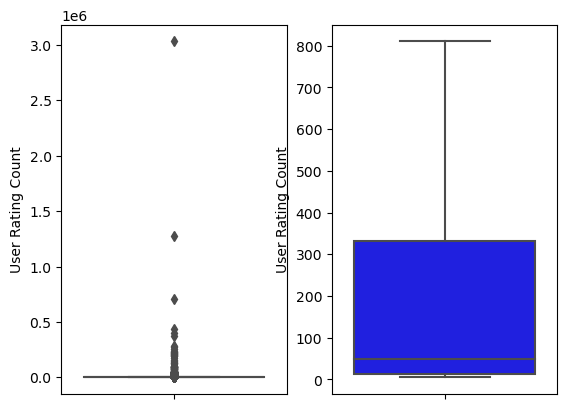

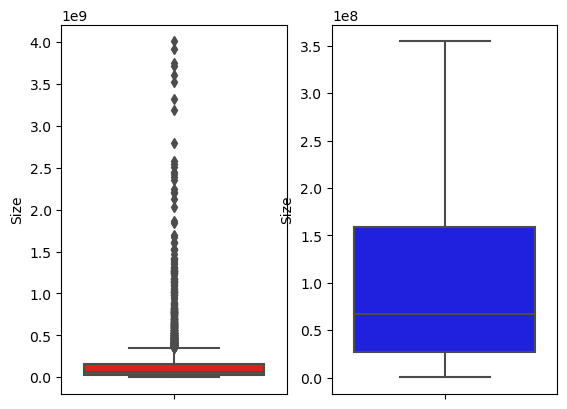

In [37]:
outliarlist=["User Rating Count","Size"]
for i in outliarlist:
    outliers(df,i)

<br>

## `6. Apply One Hot Encoding On Categories`

In [38]:
# replace tst with df
df = PreprocessListCategories(df,['Primary Genre', 'Genres', 'Languages'])

In [39]:
df.shape

(5160, 188)